In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
train = pd.read_csv(r'C:\Users\Katta\OneDrive\Desktop\DataSets\train.csv')
test = pd.read_csv(r'C:\Users\Katta\OneDrive\Desktop\DataSets\test.csv')
testids = test['id']
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


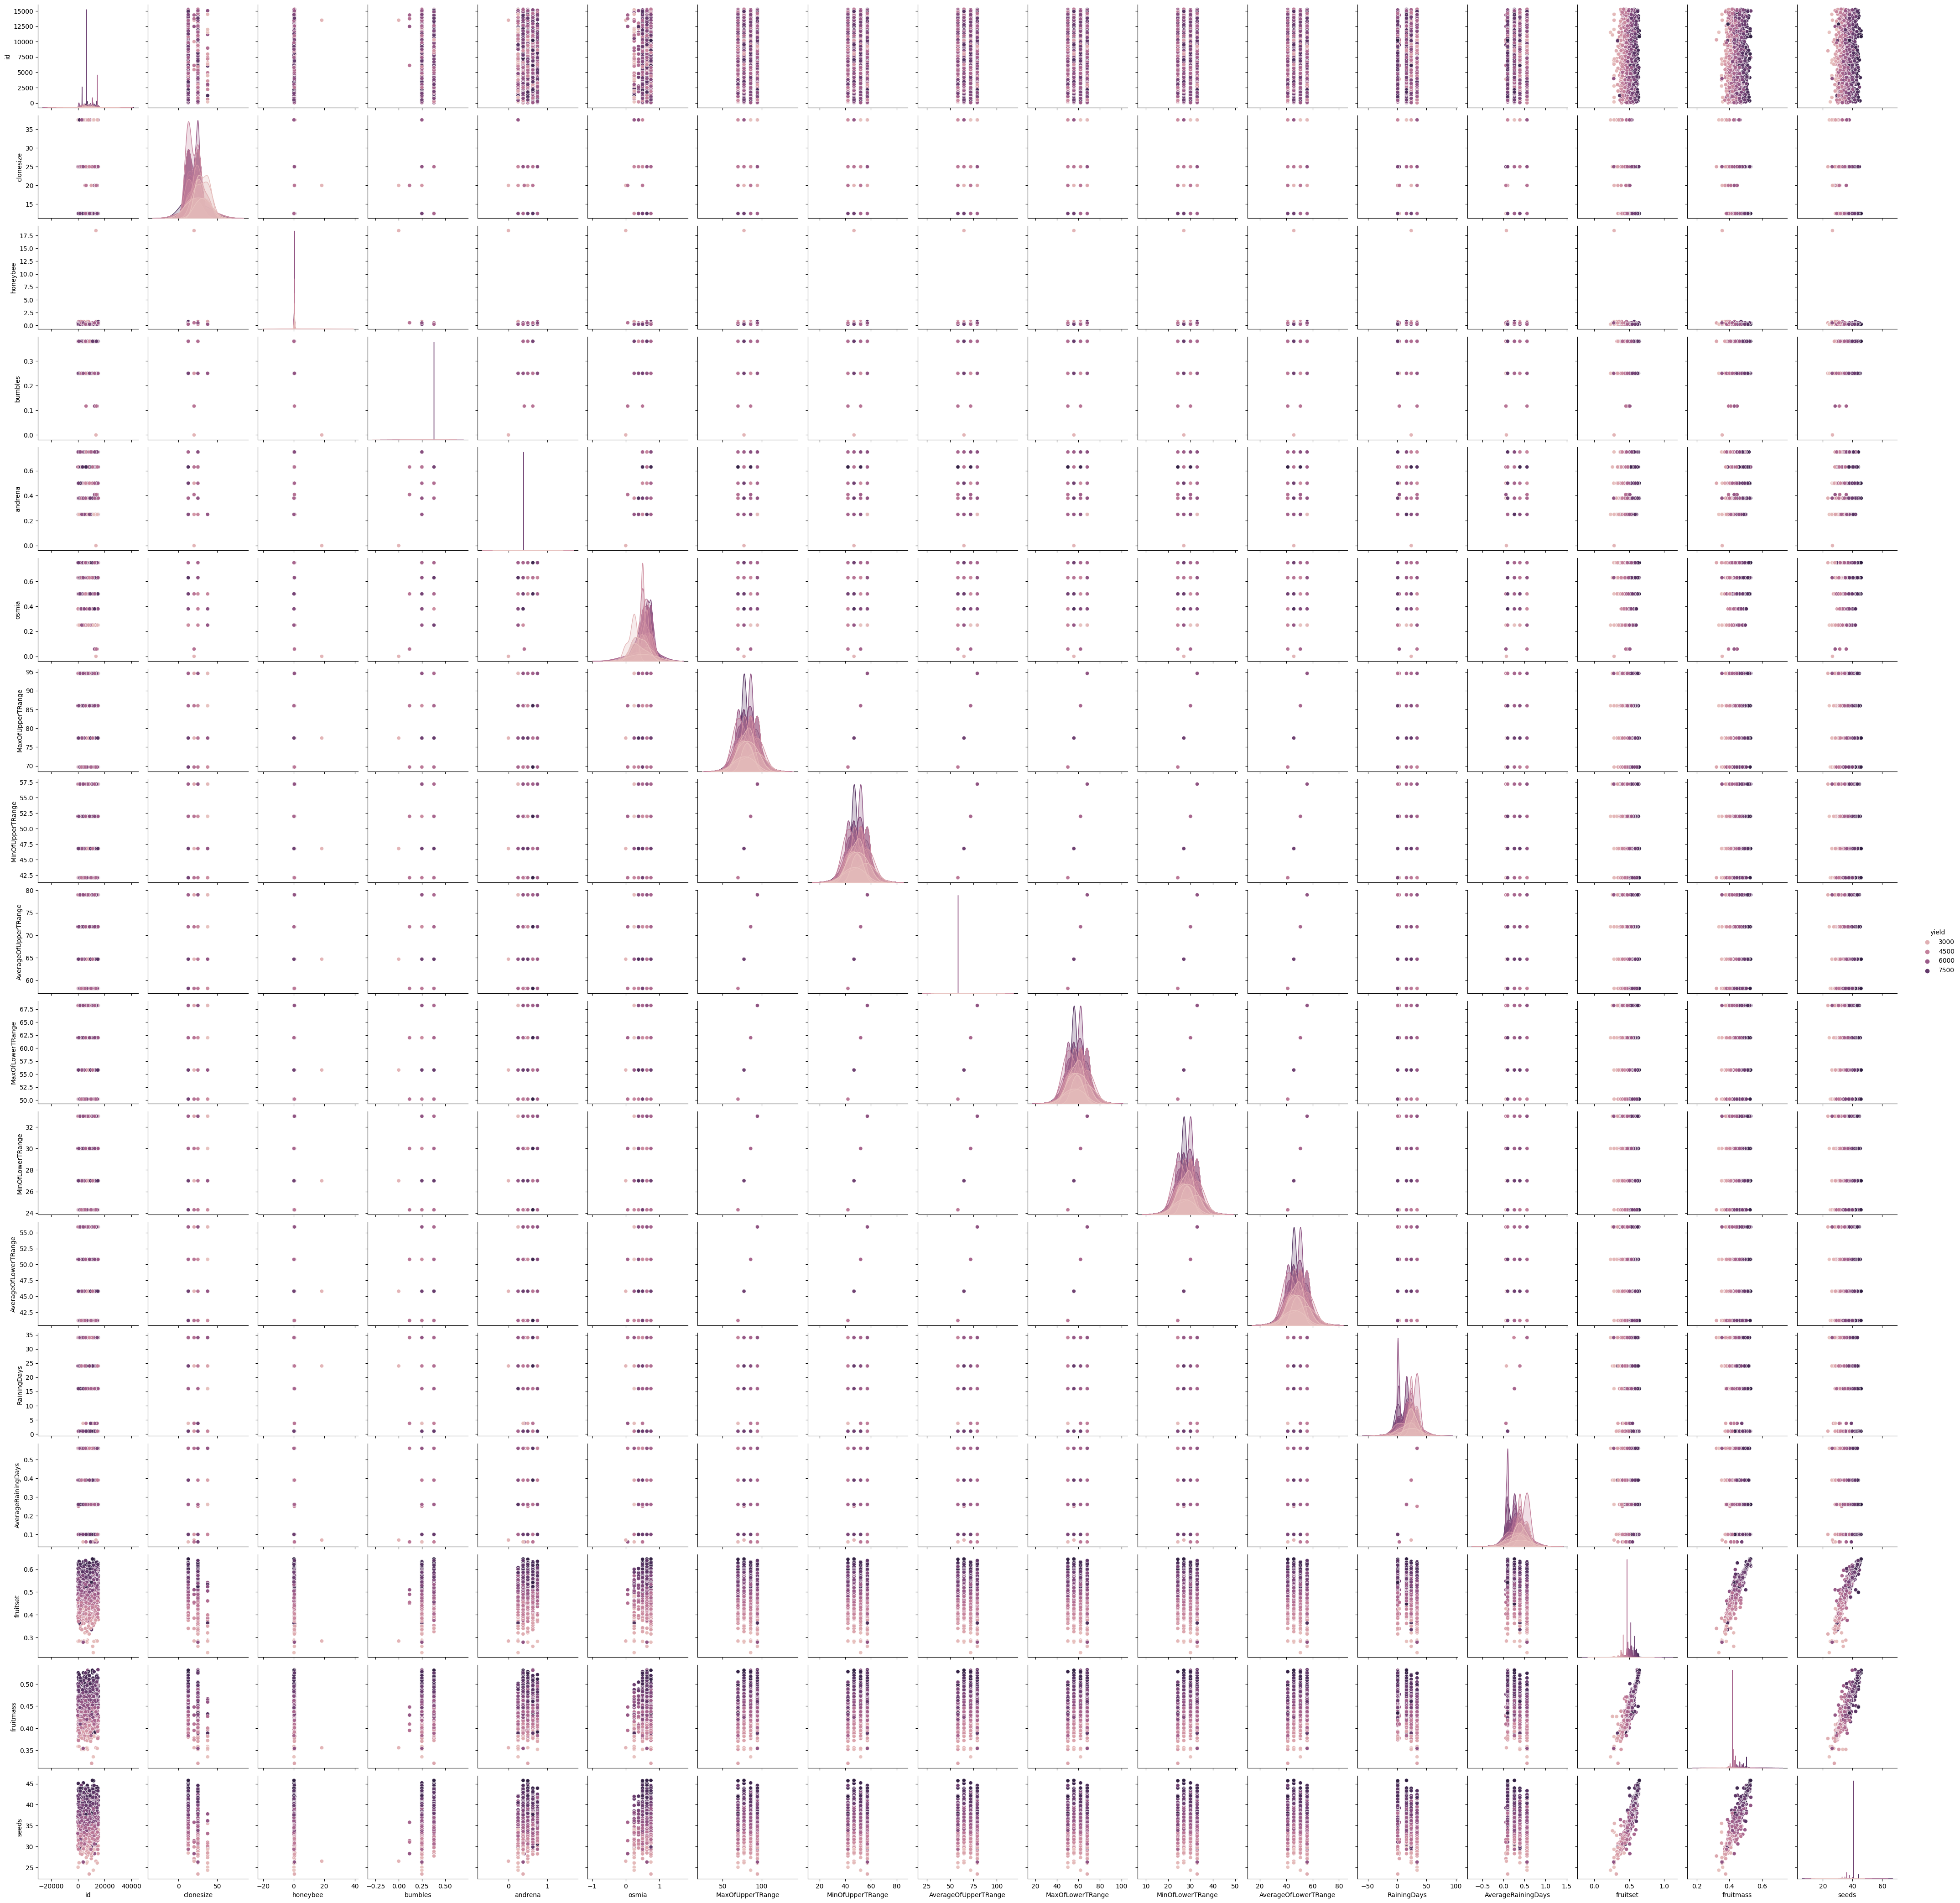

In [3]:
sns.pairplot(train.sample(n = 1000), hue='yield')

In [27]:
test.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

In [32]:
from sklearn.neighbors import KNeighborsClassifier

def clean(df):
    df.drop(['id'],axis=1,inplace=True)
    return df

train = clean(train)
test = clean(test)

train.head()
    

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = train.drop(['yield'],axis=1)
y = train['yield']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = LinearRegression()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

preds = clf.predict(test)

0.8047436748007766


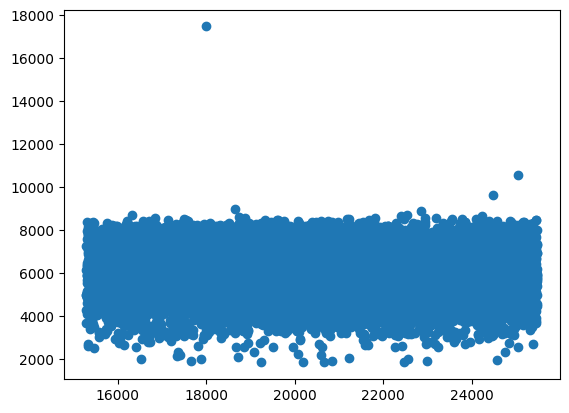

In [35]:
plt.scatter(testids,preds)

In [37]:
preds

array([4293.70221069, 6113.03838003, 7242.09864098, ..., 6906.47941471,
       4465.36401576, 7322.77413658])

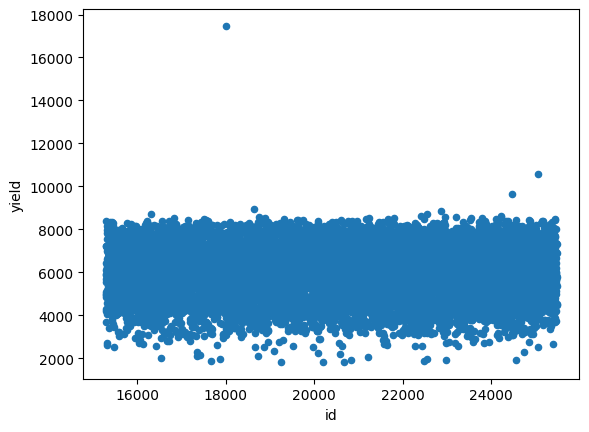

In [45]:
sub = pd.DataFrame({'id':testids,'yield':preds})
sub.plot(kind='scatter',x='id',y='yield')
sub.to_csv(r'C:\Users\Katta\OneDrive\Desktop\Datasets\sub_blueberry.csv',index=False)